In [402]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
city_df.head()

ride_df = pd.read_csv(ride_data_to_load)
ride_df.head()

# Combine the data into a single dataset
merge_table = pd.merge(ride_df, city_df, on="city", how = "left")

# Display the data table for preview
merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

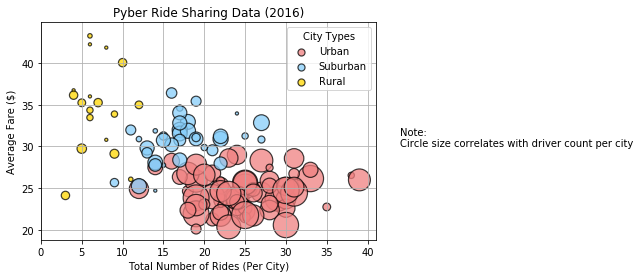

In [403]:

# Obtain the x and y coordinates for each of the three city types

#Urban x, y, and z coordinates
urban_row = merge_table.loc[merge_table["type"] == "Urban"]
urban_column = urban_row.groupby("city")
total_rides_urban_x = urban_column["ride_id"].count()
average_fare_urban_y = urban_column["fare"].mean()
total_drivers_urban_z = urban_column["driver_count"].mean()

#Suburban x, y and z coordinates
suburban_row = merge_table.loc[merge_table["type"] == "Suburban"]
suburban_column = suburban_row.groupby("city")
total_rides_suburban_x = suburban_column["ride_id"].count()
average_fare_suburban_y = suburban_column["fare"].mean()
total_drivers_suburban_z = suburban_column["driver_count"].mean()

#Rural x, y and z coordinates
rural_row = merge_table.loc[merge_table["type"] == "Rural"]
rural_column = rural_row.groupby("city")
total_rides_rural_x = rural_column["ride_id"].count()
average_fare_rural_y = rural_column["fare"].mean()
total_drivers_rural_z = rural_column["driver_count"].mean()


# Build the scatter plots for each city types                               
urban = plt.scatter(total_rides_urban_x, average_fare_urban_y, s= total_drivers_urban_z*10, marker = "o", color = "LightCoral", edgecolor = 'black', label = "Urban", alpha = .75, linewidth=1.2)
suburban = plt.scatter(total_rides_suburban_x, average_fare_suburban_y, s= total_drivers_suburban_z*10, marker = "o", color = "LightSkyBlue", edgecolor = 'black', label = "Suburban", alpha = .75, linewidth=1.2)
rural = plt.scatter(total_rides_rural_x, average_fare_rural_y, s= total_drivers_rural_z*10, marker = "o", color = "Gold", edgecolor = 'black', label = "Rural", alpha = .75, linewidth=1.2)


#Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

legend = plt.legend(handles = [urban, suburban, rural],loc="best")
legend.set_title("City Types")
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

plt.grid()
plt.ylim(18.8,44.9)
plt.xlim(0,41)

# Incorporate a text label regarding circle size
plt.text(44,30,"Note:\nCircle size correlates with driver count per city")

# Save Figure
plt.savefig("../bubble_riding_share.png")

# Show plot
plt.show()

## Total Fares by City Type

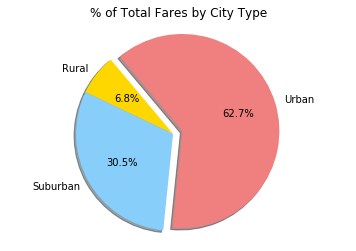

In [404]:
# Calculate Type Percents

total_fares_type = merge_table.groupby("type")["fare"].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(total_fares_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=130)
plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("../total_fares_type.png")

# Show Figure
plt.show()

## Total Rides by City Type

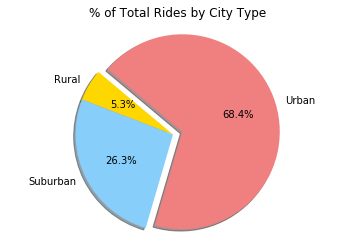

In [405]:
# Calculate Ride Percents

total_rides_type = merge_table.groupby("type")["ride_id"].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(total_rides_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
          
# Save Figure
plt.savefig("../total_rides_type.png")

# Show Figure
plt.show()


## Total Drivers by City Type

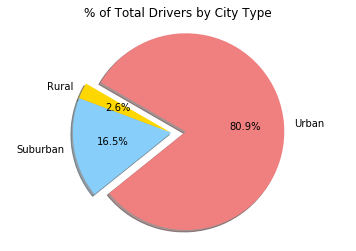

In [406]:
# Calculate Driver Percents

total_drivers_type = city_df.groupby("type")["driver_count"].sum()

# Build Pie Charts

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.15)

plt.pie(total_drivers_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("../total_drivers_type.png")

# Show Figure
plt.show()


# Pyber Sharing Data Analysis:

1. When we observe the bubble plot, the number of rides and drivers increase from rural to suburban to urban cities. In contrast, the average fare decreases from rural to suburban to urban, which might indicate that there is a negative correlation between average fare and number of rides. If we take into consideration the population density, in rural cities the population is sparsely distributed, which make the demand for pyber services lower than other types of cities. If the demand is low, becoming a Pyber driver is not attractive, which might explain the small number of drivers in rural areas. Since there are not many Pyber drivers in rural areas, the average fare increases because the competition is low, driving the prices up. Or the distance traveled might be longer than other types of cities, which contributes to the higher average fare. In any case, it might seem more lucrative to be a Pyber driver in rural areas than urban areas. It would be interesting to have some data on distance traveled and time, to determine a good strategy to attract more drivers and more clients to use Pyber services in rural and suburban areas, since it looks like there might be a potential to increase the number of users, rides and drivers.

2. In urban cities we observe that the number of drivers is higher than in any other type of city, which might be explained by the demand-supply. Since in urban areas, the population density is higher, the demand for this type of service is higher as well. So becoming a Pyber driver might seem very attractive. If the supply of drivers is high, that helps to push the prices down or the average fares down. One other explanation for the loser average fare is the distance traveled, since in urban areas the distances might be shorter than in rural and suburban areas. We could have a better analysis, if we have more data on distance traveled and time. In any case, being a Pyber driver in urban cities, it might not be as lucrative as it seems to be. Or there are other areas that could be explored by urban Pyber drivers, where they can increase their income. 

3. When we compare the three pie charts, we see the number of drivers in rural areas is only 2.6%, but the total rides is 5.3% and the total fare is 6.8%, more than double the number of drivers. In contrast, the urban drivers represent 80.9%; however the total rides is 68.4% and the total fare is 62.7%. The total rides for urban cities is inferior to the number of total drivers. This comparison suggests that rural drivers have the possiblity to make higher profits than in urban cities. If we take the suburban cities into consideration, we observe the same trend. Suburban cities are better for Pyber drivers. Therefore, urban cities seem to be better for Pyber users, since they can get a better fare than in other types of cities. However, rural and suburban cities seem to be better for Pyber drivers, once the average fare is higher than urban cities and the competition is lower.